<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/arbolesDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [4]:
pip install scikit-learn


In [5]:
pip install --upgrade scikit-learn


In [19]:
from matplotlib import pyplot as plt

In [6]:
from sklearn.metrics import mean_absolute_error


ALGORITMOS BASADOS EN DATOS DE REGRECIÓN SE FUNDAMENTAN EN DATOS TABULARES

QUE QUEPAN EN CUALQUIER HOJA DE EXCEL

QUIERO PREDECIR CUANTOS HELADOS ME VOY A COMER

In [7]:
temperaturas = [30, 33, 29, 35, 32, 38]
helados = [3, 5, 1, 4, 6, 15]
peso = [78, 78, 65, 65, 90, 90]
hizo_ejercicio = [0, 0, 0, 1, 0, 1]

In [8]:
variables = list(zip(temperaturas, peso, hizo_ejercicio))
variables

[(30, 78, 0), (33, 78, 0), (29, 65, 0), (35, 65, 1), (32, 90, 0), (38, 90, 1)]

ARBOLES DE SECISIÓN

In [9]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [10]:
#tree_model = DecisionTreeRegressor(random_state=42)
#tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3, max_leaf_nodes=2)
tree_model = tree_model.fit(variables,helados)

**DEFINICIONES:**

leaf node = Nodos de decisión sin hijos.

Depth=La longitud del camino más largo desde el nodo raiz hasta una hoja.

In [11]:
mean_absolute_error(helados, tree_model.predict(variables))

1.2

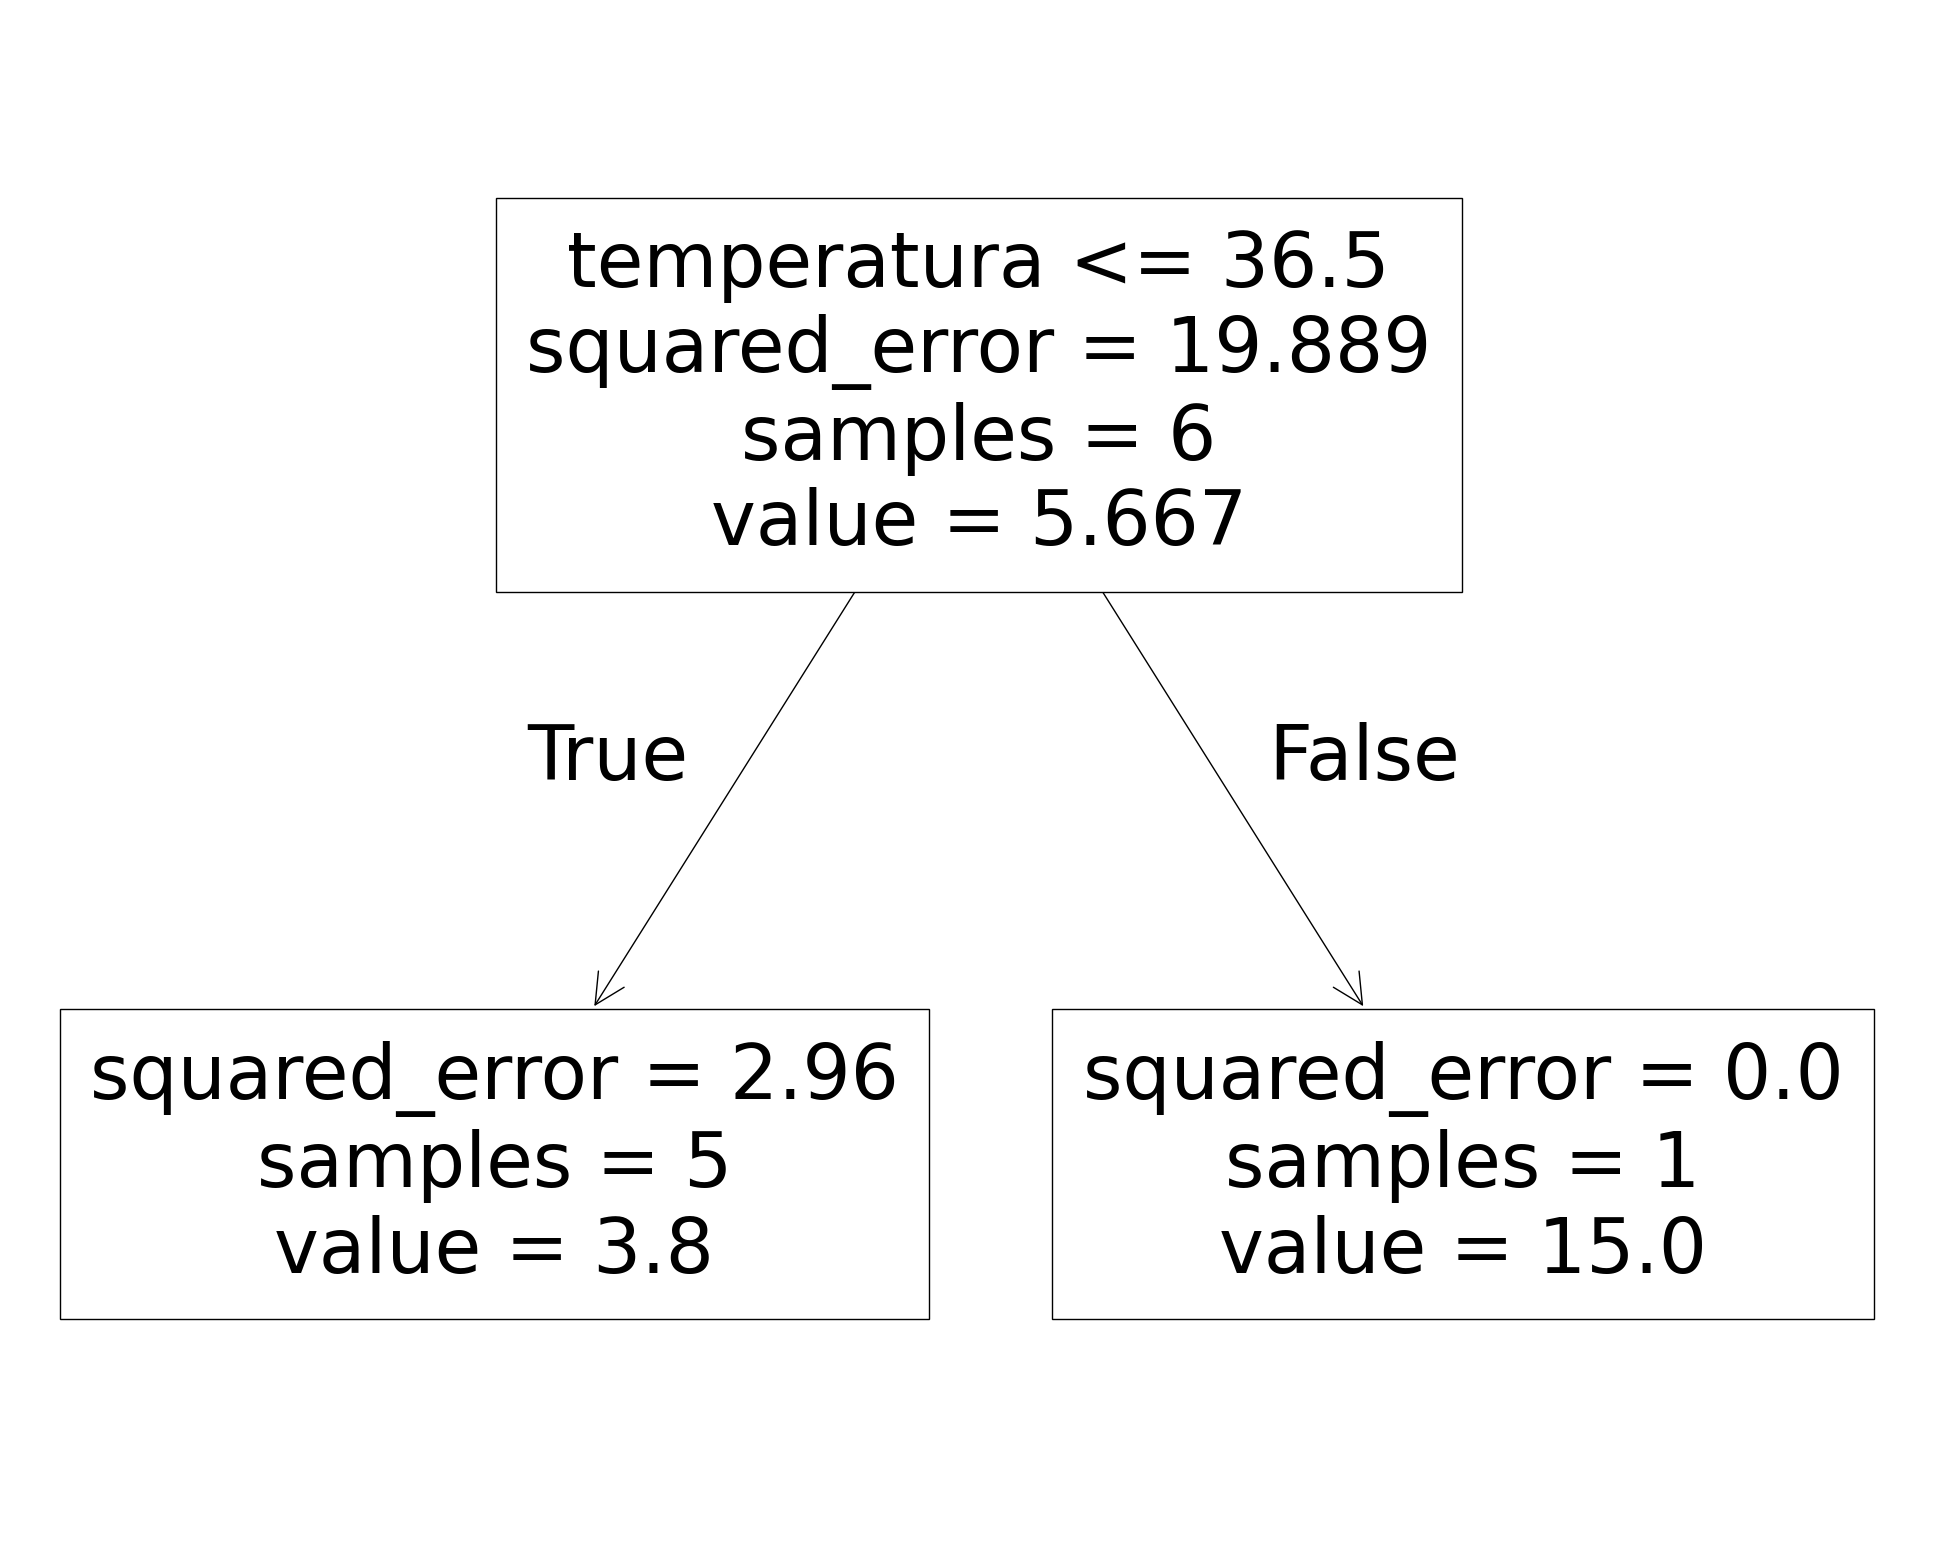

In [20]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_model, feature_names=['temperatura','peso','hizo_ejercicio'])
plt.show()


MODELOS ENSEMBLE

Un modelo 'Ensemble' es un método que combina las predicciones de múltiples modelos individuales para mejorar la robustez y precisión de las predicciones

Existen distintos tipod de modelo ensemble en función de cómo se 'ensamblan' esos modelos individuales. Los dos más importantes son:

*   Bagging(Boostrap Aggregating)
*   Boosting




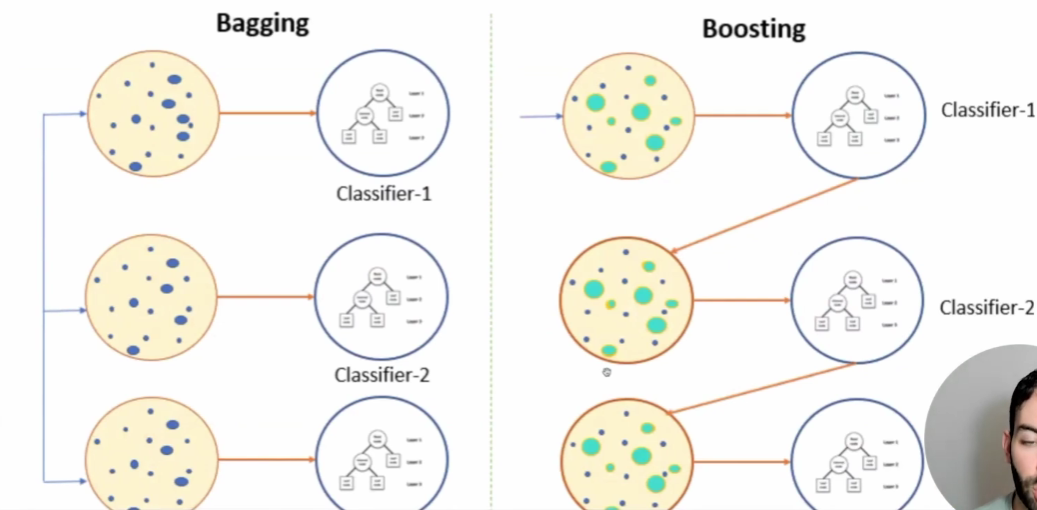

BAGGING

RANDOM FOREST

1.Divide los datos en N conjuntos de datos aleatoriamente mezclados y pududiendo repetir muestras(Boostrapping)   
2. Ajusta un arbol de decisión a cada conjunto
3. Promedia el resultado obtenido por cadaarbol





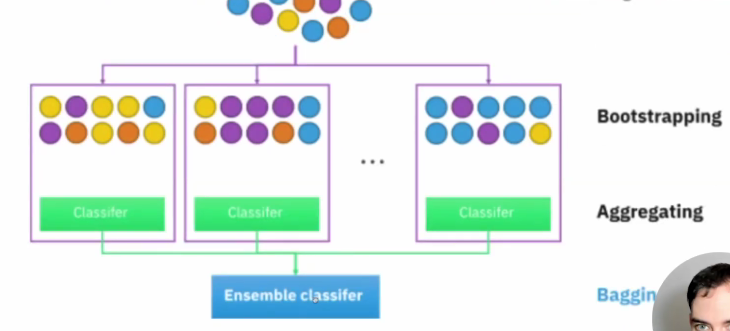

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
#random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
#random_forest_model = RandomForestRegressor(random_state=42, n_estimators=1, bootstrap=False)
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=3, max_leaf_nodes=2)
random_forest_model= random_forest_model.fit(variables, helados)

In [30]:
mean_absolute_error(helados, random_forest_model.predict(variables))

1.4728333333333339

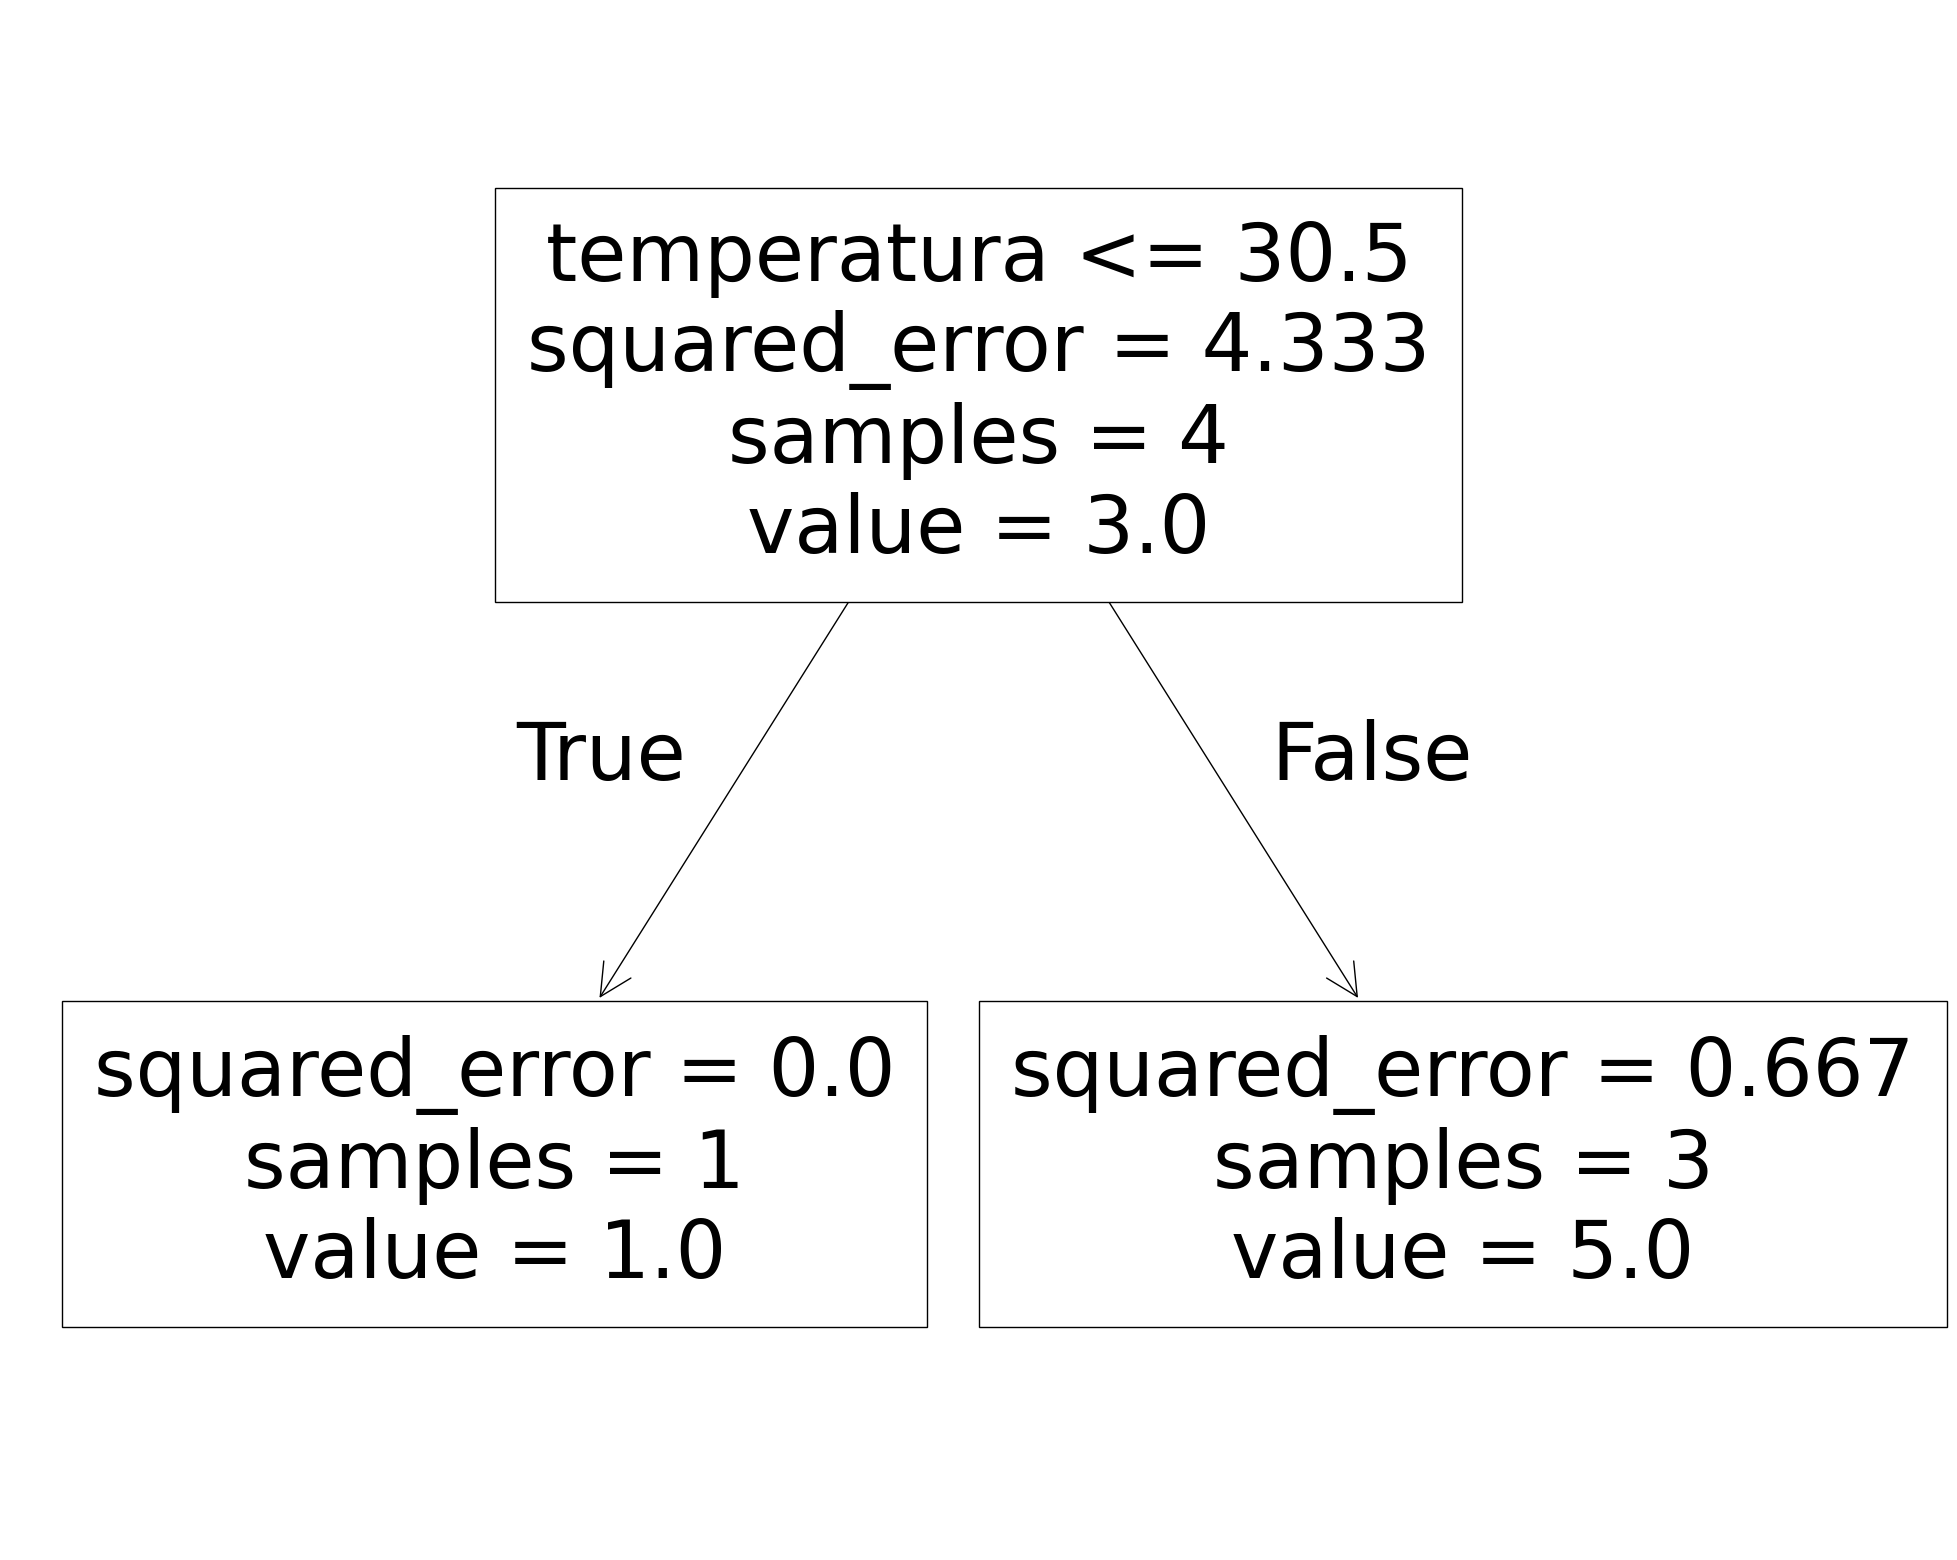

In [31]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(random_forest_model.estimators_[0], feature_names=["temperatura","peso","hizo_ejercicio"])
plt.show()

**Boosting**

Gradient Boosting



1.   Coge todo el dataset y ajusta un primer árbol de decisión
2.   Se calcula el target (Y) y también los errores (residuos)
3. Ajusta un segundo arbol de decisión pero en lugar de ajustarlo al target(Y) lo ajustamos a los errores del anterior paso
4. Se repite el 3 N veces
5. De todos los arboles ajustados, del segundo al último arbol, se coge el error predicho y se multiplica por el learning_rate y se suma a la predicción inicial


UN MODELO QUE VA INTENTAR PRECIR N VECES EL ERROR DE LOS ANTERIORES

si sumamos todos los errores va intentar corregirlo y hacer cada vez más precisa la predición - (Es un bucle iteratívo)

Vamos a prodmediar aplicamos un learning rate, y sumarlo o restarlo a la primera predicción

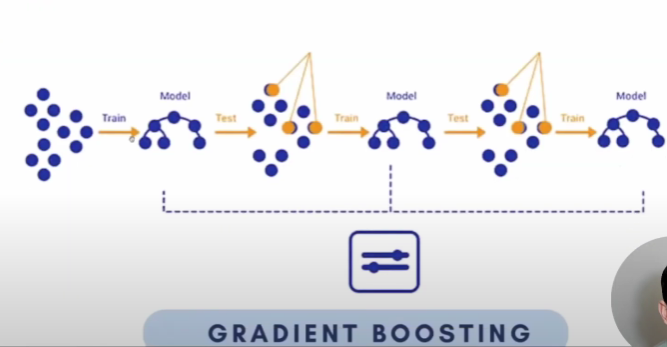

In [32]:
from sklearn.ensemble import GradientBoostingRegressor